In [1]:
import csv
import pandas as pd
import numpy as np

df=pd.read_csv('train.csv')
print df.head()
grp=df.groupby(['Junction'])
group3=grp.get_group(3);
# print group3

              DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041


In [2]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
data = pd.read_csv('train.csv', parse_dates=['DateTime'], index_col='DateTime',date_parser=dateparse)
# print data
ts = data['Vehicles'] 


DateTime
2015-11-01 00:00:00    15
2015-11-01 01:00:00    13
2015-11-01 02:00:00    10
2015-11-01 03:00:00     7
2015-11-01 04:00:00     9
Name: Vehicles, dtype: int64


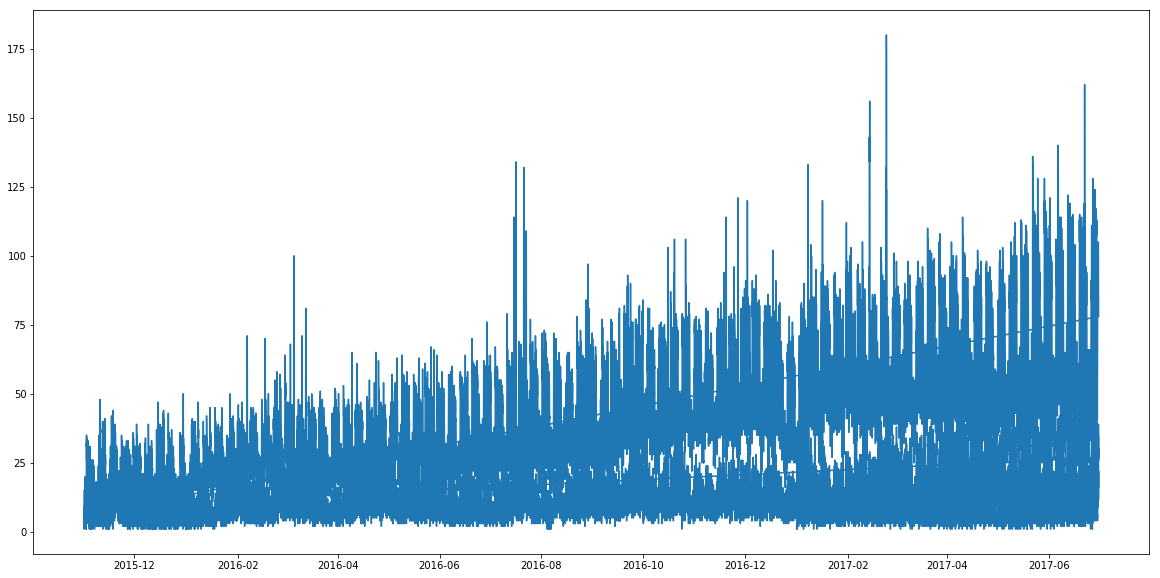

In [4]:
plt.plot(ts)
plt.show()

In [5]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [6]:
# test_stationarity(ts)

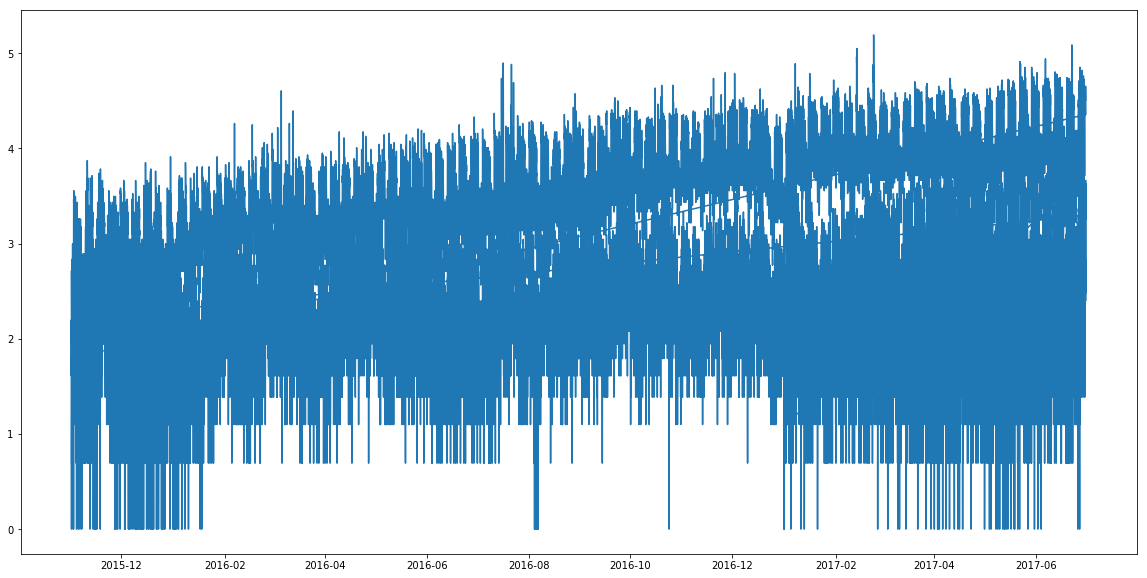

In [7]:
# test_stationarity(ts)
ts_log = np.log(ts)
plt.plot(ts_log)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


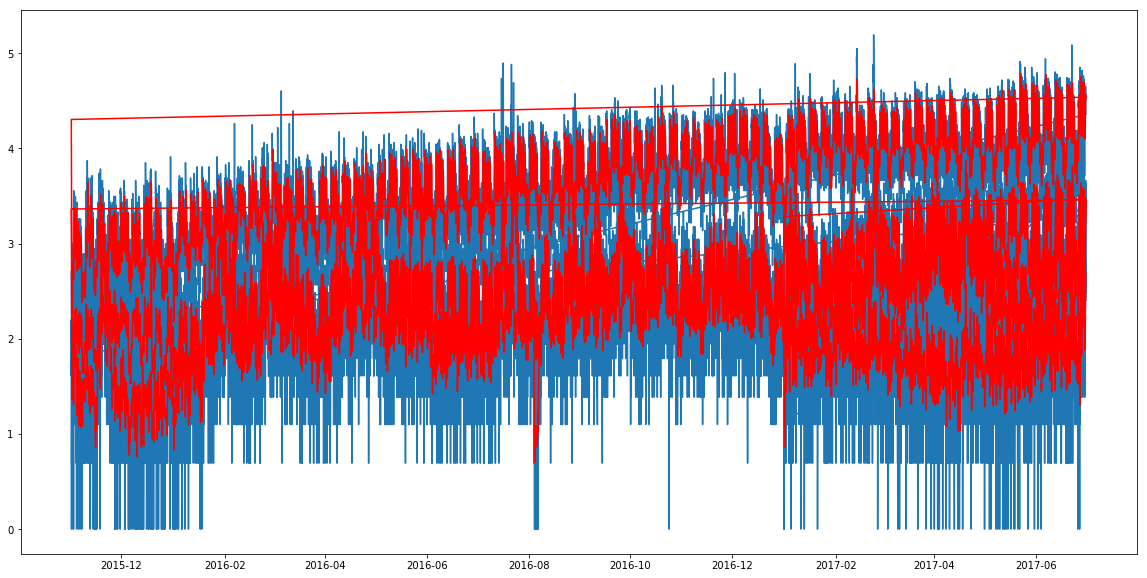

In [8]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')
plt.show()

In [9]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(50)

DateTime
2015-11-01 00:00:00         NaN
2015-11-01 01:00:00         NaN
2015-11-01 02:00:00         NaN
2015-11-01 03:00:00         NaN
2015-11-01 04:00:00         NaN
2015-11-01 05:00:00         NaN
2015-11-01 06:00:00         NaN
2015-11-01 07:00:00         NaN
2015-11-01 08:00:00         NaN
2015-11-01 09:00:00         NaN
2015-11-01 10:00:00         NaN
2015-11-01 11:00:00    0.482279
2015-11-01 12:00:00    0.416276
2015-11-01 13:00:00    0.339813
2015-11-01 14:00:00    0.365184
2015-11-01 15:00:00    0.032586
2015-11-01 16:00:00    0.008612
2015-11-01 17:00:00    0.214559
2015-11-01 18:00:00    0.222184
2015-11-01 19:00:00    0.308346
2015-11-01 20:00:00    0.109550
2015-11-01 21:00:00    0.182481
2015-11-01 22:00:00    0.209801
2015-11-01 23:00:00   -0.067451
2015-11-02 00:00:00   -0.125316
2015-11-02 01:00:00   -0.260871
2015-11-02 02:00:00   -0.095593
2015-11-02 03:00:00   -0.249744
2015-11-02 04:00:00   -0.249744
2015-11-02 05:00:00   -0.305531
2015-11-02 06:00:00   -0.116121

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


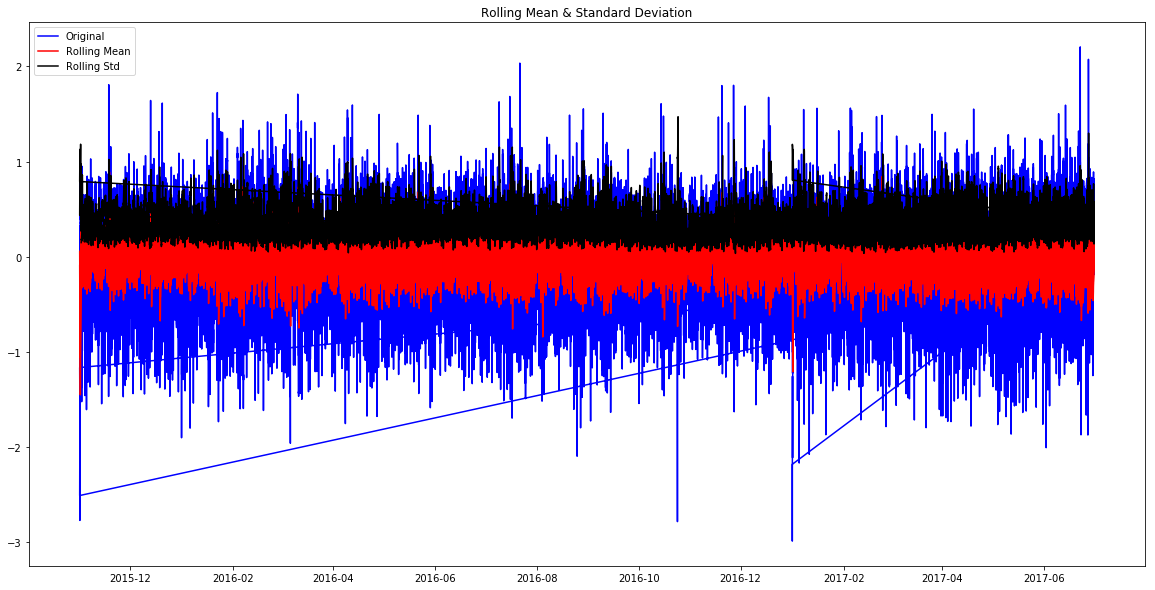

Results of Dickey-Fuller Test:
Test Statistic                   -35.698923
p-value                            0.000000
#Lags Used                        57.000000
Number of Observations Used    48051.000000
Critical Value (5%)               -2.861600
Critical Value (1%)               -3.430486
Critical Value (10%)              -2.566802
dtype: float64


In [10]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,ignore_na=False,min_periods=0,adjust=True).mean()
  """Entry point for launching an IPython kernel.


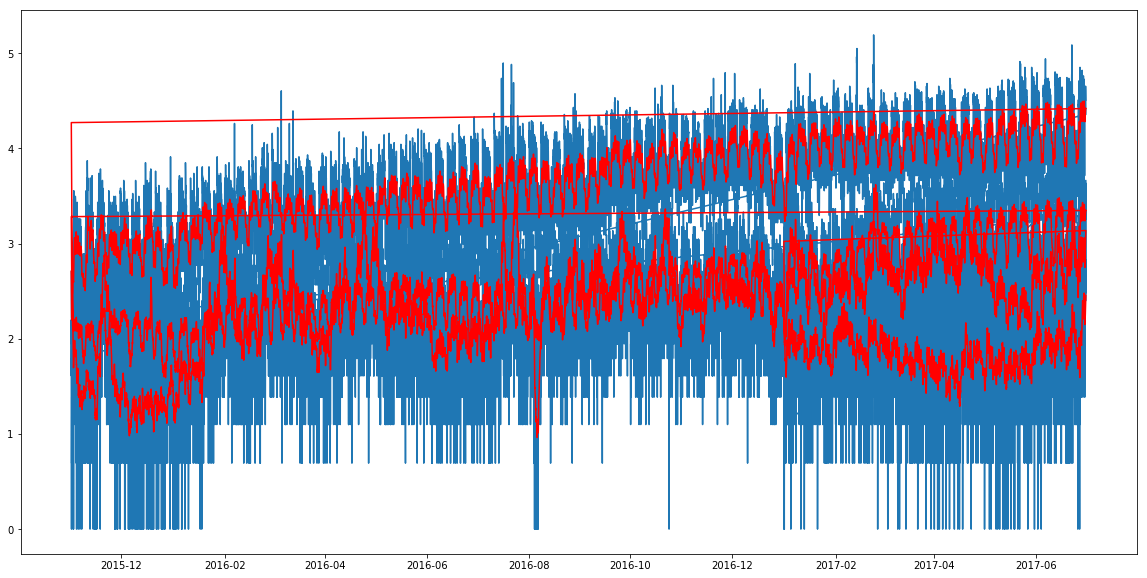

In [11]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


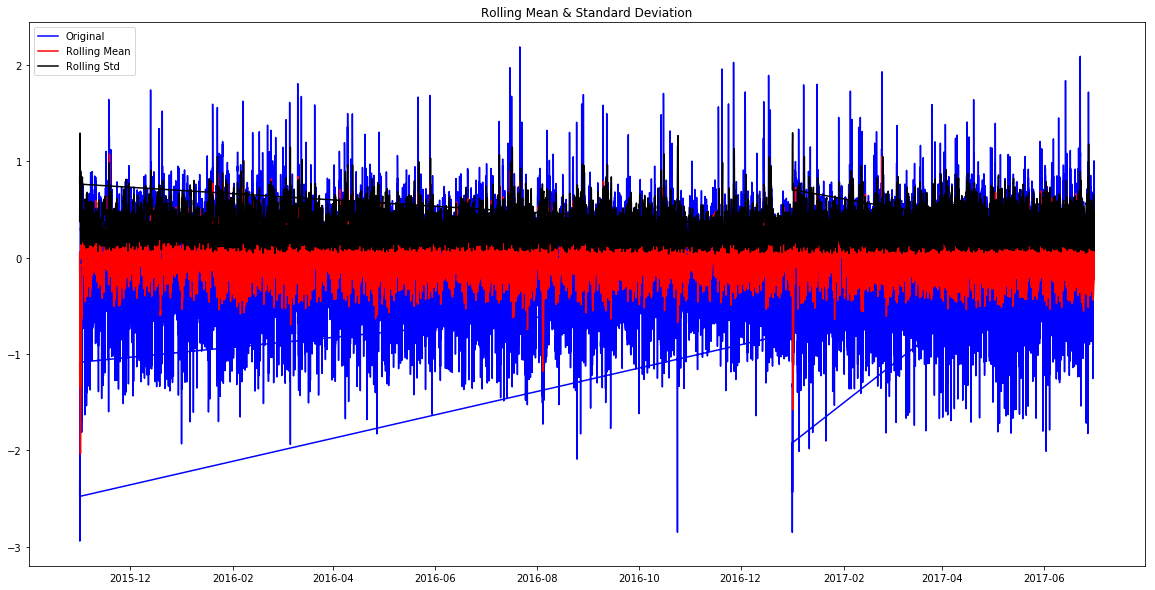

Results of Dickey-Fuller Test:
Test Statistic                   -35.819815
p-value                            0.000000
#Lags Used                        56.000000
Number of Observations Used    48063.000000
Critical Value (5%)               -2.861600
Critical Value (1%)               -3.430486
Critical Value (10%)              -2.566802
dtype: float64


In [12]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

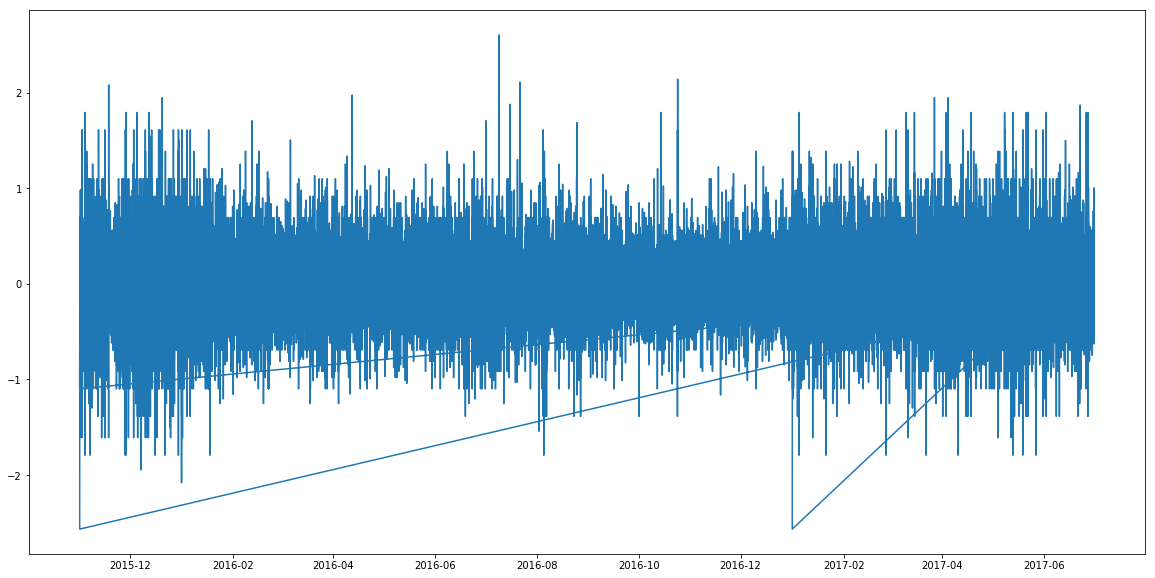

In [13]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


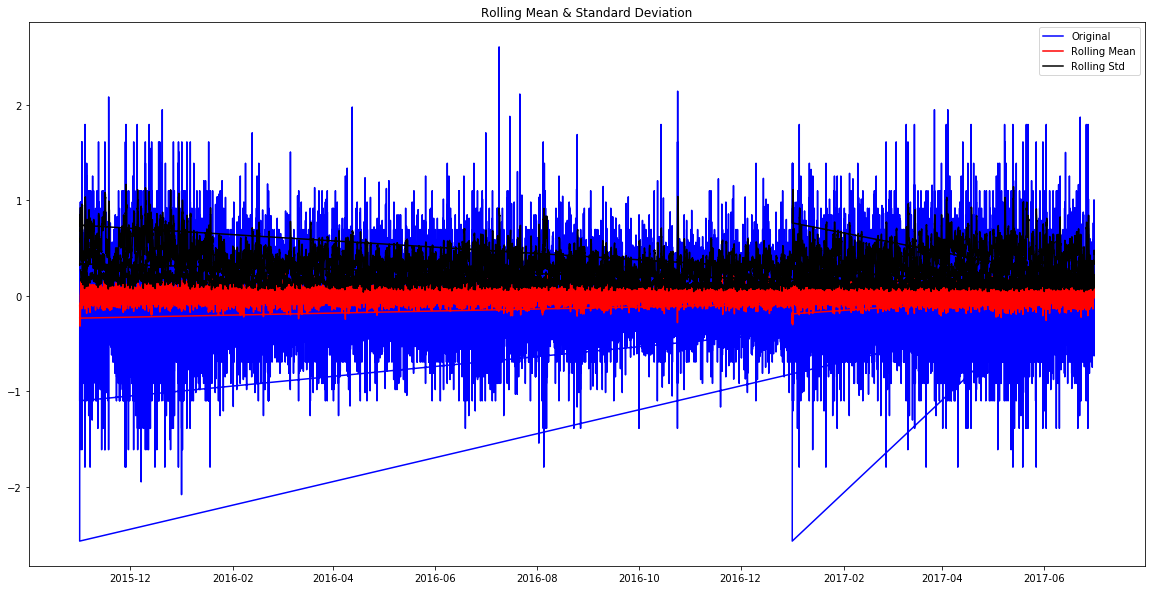

Results of Dickey-Fuller Test:
Test Statistic                   -34.145554
p-value                            0.000000
#Lags Used                        57.000000
Number of Observations Used    48061.000000
Critical Value (5%)               -2.861600
Critical Value (1%)               -3.430486
Critical Value (10%)              -2.566802
dtype: float64


In [14]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [15]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# decomposition = seasonal_decompose(ts_log)

# trend = decomposition.trend
# seasonal = decomposition.seasonal
# residual = decomposition.resid

# plt.subplot(411)
# plt.plot(ts_log, label='Original')
# plt.legend(loc='best')
# plt.subplot(412)
# plt.plot(trend, label='Trend')
# plt.legend(loc='best')
# plt.subplot(413)
# plt.plot(seasonal,label='Seasonality')
# plt.legend(loc='best')
# plt.subplot(414)
# plt.plot(residual, label='Residuals')
# plt.legend(loc='best')
# plt.tight_layout()

ValueError: You must specify a freq or x must be a pandas object with a timeseries index witha freq not set to None

In [16]:
from statsmodels.tsa.stattools import acf, pacf


In [17]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5,1,u'Autocorrelation Function')

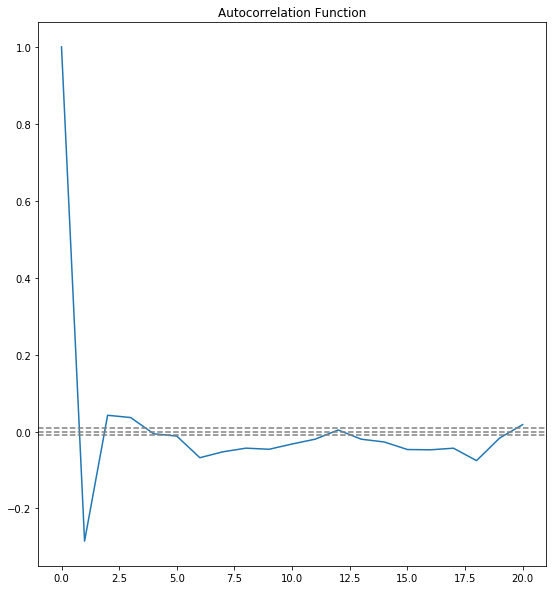

In [18]:
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

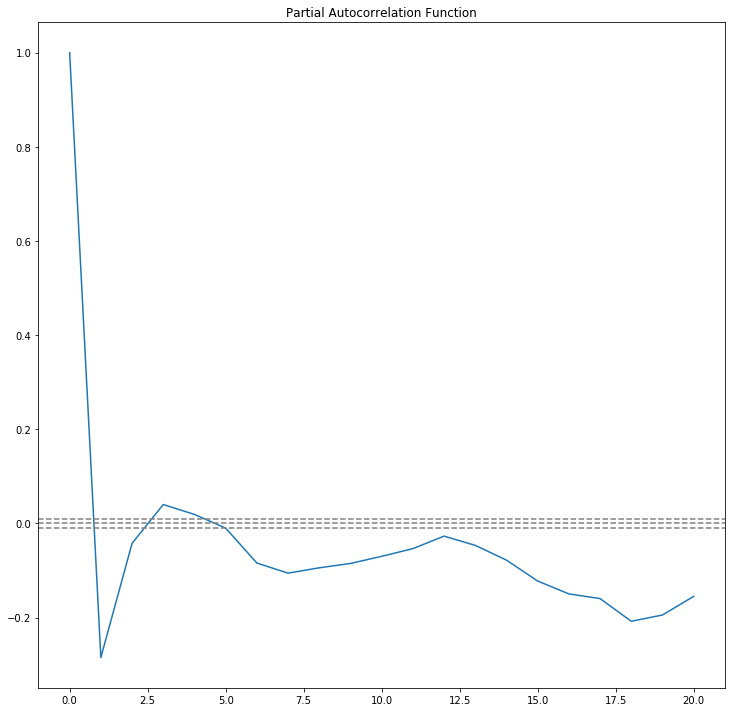

In [19]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [ ]:
# from statsmodels.tsa.arima_model import ARIMA
# model = ARIMA(ts_log, order=(2, 1, 0))  
# results_AR = model.fit(disp=-1)  
# plt.plot(ts_log_diff)
# plt.plot(results_AR.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

In [ ]:
# model = ARIMA(ts_log, order=(0, 1, 2))  
# results_MA = model.fit(disp=-1)  
# plt.plot(ts_log_diff)
# plt.plot(results_MA.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

In [ ]:
# model = ARIMA(ts_log, order=(2, 1, 2))  
# results_ARIMA = model.fit(disp=-1)  
# plt.plot(ts_log_diff)
# plt.plot(results_ARIMA.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [ ]:
# from statsmodels.tsa.arima_model import ARIMA
# model = ARIMA(ts_log_diff, order=(5,1,0))
# model_fit = model.fit(disp=0)
# print(model_fit.summary())


In [ ]:
# residuals = pd.DataFrame(model_fit.resid)
# residuals.plot()
# grp=df.groupby(['Junction'])
# group3=grp.get_group(2);
# plt.show()
# residuals.plot(kind='kde')
# plt.show()
# print(residuals.describe())

In [20]:
print "swapnil"

swapnil


In [30]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

X=ts_log_diff.values
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
i=0
for t in range(len(test)):
    try:
        model = ARIMA(history, order=(0.5,0.5,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
        if i>5:
            break
        i=i+1;
    except:
        break
#error = mean_squared_error(test, predictions)

In [ ]:
# from statsmodels.tsa.arima_model import ARIMA

# X=ts_train.values
# size = int(len(X) * 0.75)
# train, test = X[0:size], X[size:len(X)]
# history = [x for x in train]
# predictions = list()

# for p in range(6):
#     for d in range(2):
#         for q in range(4):
#             for t in range(len(test)):
#                 try:
#                     model = ARIMA(history, order=(0,1,0))
#                     model_fit = model.fit(disp=0)
#                     output = model_fit.forecast()
#                     yhat = output[0]
#                     predictions.append(yhat)
#                     obs = test[t]
#                     history.append(obs)
#                     print "'predicted=%f, expected=%f'",(yhat, obs)
#                     print p,d,q
#                 except:
#                     print p,d,q 
# error = mean_squared_error(test, predictions)